In [1]:
import sys
!{sys.executable} --version

import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

%matplotlib inline

Python 3.8.8


# download price histories

In [2]:
# https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average
# two most recently added stocks to the Dow Jones index and are listed on the NYSE
# get DJI names and inclusion dates fromhttps://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

companies, tickers = ['Honeywell','AMGN'],['HON','AMGN']

tickers_df = yf.download(tickers, 
                      start='2017-01-01', 
                      end='2021-09-02', 
                      progress=False, auto_adjust=True)
display(tickers_df.head())
display(tickers_df.tail())

Close                    High                     Low  \
                  AMGN         HON        AMGN         HON        AMGN   
Date                                                                     
2017-01-03  131.576477  101.104836  131.812171  101.731413  128.425205   
2017-01-04  133.444534  101.383316  134.186529  101.792329  132.484321   
2017-01-05  133.540558  101.609543  133.907186  102.218712  132.257352   
2017-01-06  136.857697  103.149902  140.541455  103.306548  136.761674   
2017-01-09  138.655960  102.297058  138.751983  103.028057  136.726796   

                              Open               Volume           
                   HON        AMGN         HON     AMGN      HON  
Date                                                              
2017-01-03  100.565285  129.071177  101.496447  3640900  3155931  
2017-01-04  100.974296  132.763651  101.505146  3945900  3069124  
2017-01-05  101.139612  133.313601  101.409387  3441700  2766030  
2017-01-06  101.392013  139.563780  101.766217  9899300  3770361  
2017-01-09  102.297058  137.058499  102.923629  4247700  4030573

Close                    High                     Low  \
                  AMGN         HON        AMGN         HON        AMGN   
Date                                                                     
2021-08-26  221.470001  230.880005  222.059998  231.179993  220.160004   
2021-08-27  222.779999  231.139999  225.360001  233.559998  220.220001   
2021-08-30  224.130005  231.869995  225.309998  232.779999  222.100006   
2021-08-31  225.529999  231.910004  225.649994  232.649994  223.339996   
2021-09-01  223.350006  229.800003  226.119995  233.190002  221.880005   

                              Open               Volume           
                   HON        AMGN         HON     AMGN      HON  
Date                                                              
2021-08-26  229.429993  222.059998  230.080002  2844500  1303100  
2021-08-27  230.660004  222.220001  231.580002  2660900  1662200  
2021-08-30  230.559998  222.279999  231.220001  1881800  1318300  
2021-08-31  230.570007  224.940002  231.429993  2904700  1956300  
2021-09-01  229.300003  225.550003  232.949997  2699000  2484300

# calculate return statistics

In [3]:
from math import log

returns = tickers_df['Close'].applymap(log).diff()[1:]
returns

,AMGN,HON
Date,,
2017-01-04,0.014098,0.002751
2017-01-05,0.000719,0.002229
2017-01-06,0.024536,0.015046
2017-01-09,0.013054,-0.008302
2017-01-10,-0.000504,0.002549
...,...,...
2021-08-26,-0.000542,0.000953
2021-08-27,0.005898,0.001125
2021-08-30,0.006042,0.003153


In [4]:
stats = returns.agg(['mean', 'std', 'var'])
correl = returns.corr()
rho = correl.iloc[0,1]
display(stats)
display(correl)
rho

,AMGN,HON
mean,0.000451,0.000699
std,0.016102,0.016198
var,0.000259,0.000262


,AMGN,HON
AMGN,1.000000,0.439067
HON,0.439067,1.000000


0.43906730906948743

# plot stocks in the risk-return space

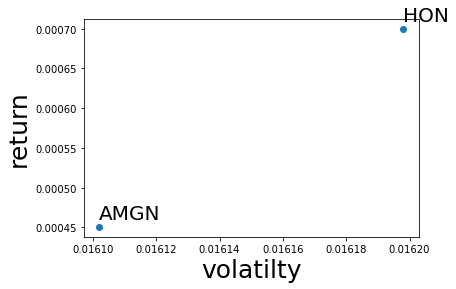

In [5]:
plt.plot(stats.loc['std',:], stats.loc['mean'],'o')
for x0,y0,name in zip(stats.loc['std',:], stats.loc['mean'], stats.columns):
    plt.text(x0,y0+.00001,name,fontsize=20)
plt.xlabel('volatilty', fontsize=25)
plt.ylabel('return', fontsize=25)
plt.show()

# calculate portfolios on the efficient frontier
## calculate returns for different weighted combinations of the 2 stocks

$\mu_p = w_1\mu_1+w_2\mu_2$

In [6]:
w1 = np.arange(0,1.1,.1)
w2 = 1.0 - w1
w = np.array([w1, w2])
display(w)

display(stats.loc['mean',:].values)
y = stats.loc['mean',:].values.dot(w)
y

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       [1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]])

array([0.00045073, 0.00069936])

array([0.00069936, 0.0006745 , 0.00064964, 0.00062477, 0.00059991,
       0.00057504, 0.00055018, 0.00052532, 0.00050045, 0.00047559,
       0.00045073])

## calculate volatility for different weighted combinations of the 2 stocks
$\sigma_p = \sqrt{w_1^2\sigma_1^2 + w_2^2\sigma_2^2+2\rho w_1 w_2 \sigma_1 \sigma_2}$

In [7]:
ww = np.array([w1 * w1, w2 * w2, w1 * w2])
display(ww)
sd = stats.loc['std',:].values
print(sd[0] * sd[0], sd[1] * sd[1], sd[0] * sd[1])
x = np.sqrt(np.array([sd[0] * sd[0], sd[1] * sd[1], sd[0] * sd[1]]).dot(ww))

array([[0.  , 0.01, 0.04, 0.09, 0.16, 0.25, 0.36, 0.49, 0.64, 0.81, 1.  ],
       [1.  , 0.81, 0.64, 0.49, 0.36, 0.25, 0.16, 0.09, 0.04, 0.01, 0.  ],
       [0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ]])

0.0002592711107260769 0.00026237603015049287 0.0002608189501647013


# plot efficient frontier in the risk-return space

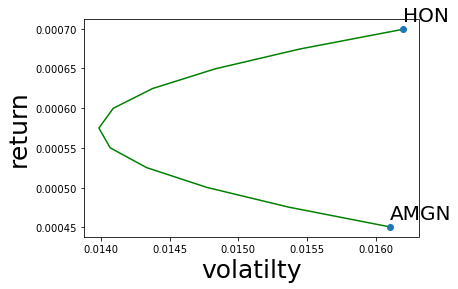

In [8]:
plt.plot(x,y,'-', color='green')
plt.plot(stats.loc['std',:], stats.loc['mean'],'o')
for x0,y0,name in zip(stats.loc['std',:], stats.loc['mean'], stats.columns):
    plt.text(x0,y0+.00001,name,fontsize=20)
plt.xlabel('volatilty', fontsize=25)
plt.ylabel('return', fontsize=25)
plt.show()

# add capital asset pricing model

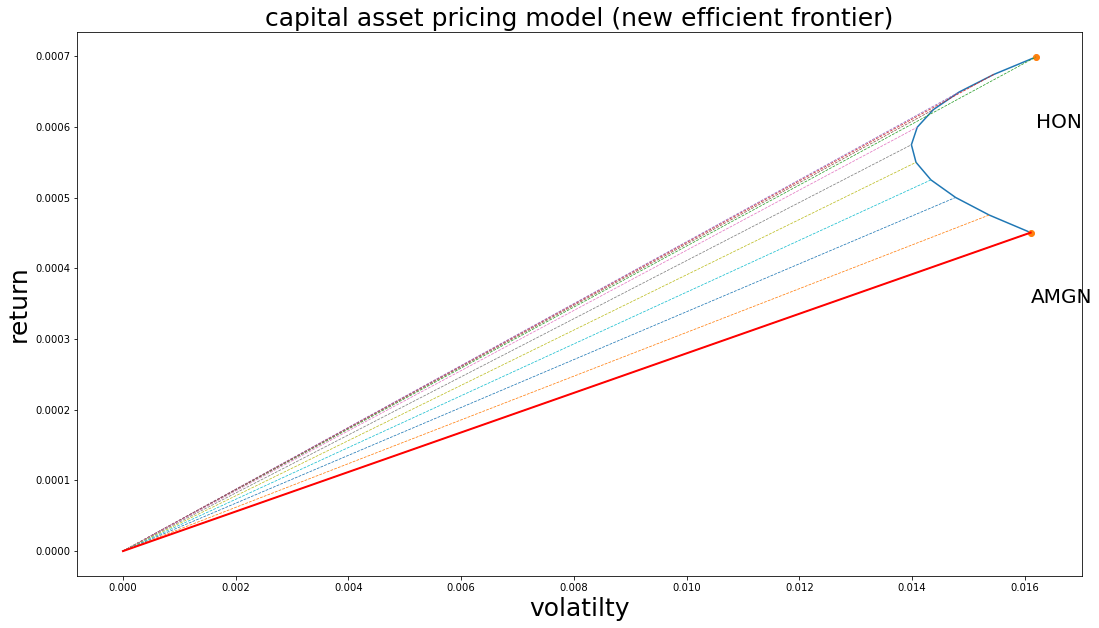

In [9]:
plt.figure(figsize=(18,10))
plt.plot(x,y,'-')
plt.plot(stats.loc['std',:], stats.loc['mean'],'o')
for x1,y1 in zip(x,y):
    plt.plot([0,x1], [0,y1], '--', linewidth=.75)
for x1,y1 in zip(x[-1:],y[-1:]):
    plt.plot([0,x1], [0,y1], '-', linewidth=2.0, color='red')
for x0,y0,name in zip(stats.loc['std',:], stats.loc['mean'], stats.columns):
    plt.text(x0,y0-.0001,name,fontsize=20)
plt.title('capital asset pricing model (new efficient frontier)',fontsize=25)
plt.xlabel('volatilty', fontsize=25)
plt.ylabel('return', fontsize=25)
plt.show()